In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import time
import math
import itertools
import numpy.matlib
import re

% matplotlib inline

In [2]:
#load data
filename = 'seqs.txt'
with open(filename) as f:
    data = f.readlines()

In [3]:
#focus on 'crp-wt' strain
focus = [f for f in data if f[:6]=='crp-wt']

In [4]:
#identify batch and sequences
batch = [b[7:9] for b in focus]
genes = []
for i,s in enumerate(focus):
    temp = re.search(batch[i]+'(.*)\n', focus[i])
    genes.append(focus[i][temp.span()[0]+3:temp.span()[1]-1])

In [5]:
#see some example sequences
print(batch[0])
print(genes[0])
print(focus[0])

B0
AATTAAGGGCAGTTAACTCACCCATTAGGCACCCCAGGCTTTACACTTTATGCTTCCGGCTCGTATGTTGTGTGG
crp-wt	B0	AATTAAGGGCAGTTAACTCACCCATTAGGCACCCCAGGCTTTACACTTTATGCTTCCGGCTCGTATGTTGTGTGG



In [6]:
#build joint probability
###count(site,batch,base)  #(made sure that all genes have the same length)
batches = np.unique(batch)
bases = np.array(['A','T','C','G'])
Count = np.zeros((len(genes[0]),len(batches),4))
for si in range(0,len(genes[0])):
    for bi,b in enumerate(batch):
        match_ba = np.where(b==batches)[0][0]
        match_bp = np.where(genes[bi][si]==bases)[0][0]
        Count[si,match_ba,match_bp] = Count[si,match_ba,match_bp]+1

In [8]:
#Compute probability(batch,base) and mutual information
Pbp = np.zeros((len(batch),4))
Ibp = np.zeros(Count.shape[0])
for si in range(0,Count.shape[0]):
    temp = np.squeeze(Count[si,:,:])
    if np.sum(temp)!=0:
        Pjoint = temp/np.sum(temp)  #P(batch,base)
        Pb = np.sum(Pjoint,axis=1)  #P(batch)
        Pn = np.sum(Pjoint,axis=0)  #P(base)
    info = np.zeros(Pjoint.shape)
    for ii in range(0,info.shape[0]):
        for jj in range(0,info.shape[1]):
            info[ii,jj] = Pjoint[ii,jj]*np.log2(Pjoint[ii,jj]/(Pb[ii]*Pn[jj]))
    Ibp[si] = np.nansum(info)  #mutual information I(batch,base)

/Users/Macintosh/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log2
/Users/Macintosh/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in double_scalars


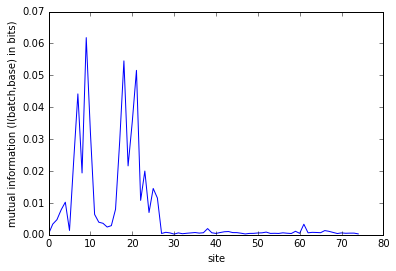

In [9]:
plt.plot(Ibp)
plt.xlabel('site')
plt.ylabel('mutual information (I(batch,base) in bits)')

### A control with shuffled data

In [10]:
###shuffling!
batches = np.unique(batch)
bases = np.array(['A','T','C','G'])
Count2 = np.zeros((len(genes[0]),len(batches),4))
for si in range(0,len(genes[0])):
    for bi,b in enumerate(batch):
        match_ba = np.where(b==batches)[0][0]
        #shuff = list(genes[bi])
        #np.random.shuffle(shuff)
        match_bp = np.random.randint(0,4)
        #np.where(shuff[si]==bases)[0][0]
        Count2[si,match_ba,match_bp] = Count2[si,match_ba,match_bp]+1

In [11]:
#Compute probability(batch,base) and mutual information
Ibp2 = np.zeros(Count.shape[0])
for si in range(0,Count.shape[0]):
    temp = np.squeeze(Count2[si,:,:])
    if np.sum(temp)!=0:
        Pjoint = temp/np.sum(temp)  #P(batch,base)
        Pb = np.sum(Pjoint,axis=1)  #P(batch)
        Pn = np.sum(Pjoint,axis=0)  #P(base)
    info = np.zeros(Pjoint.shape)
    for ii in range(0,info.shape[0]):
        for jj in range(0,info.shape[1]):
            info[ii,jj] = Pjoint[ii,jj]*np.log2(Pjoint[ii,jj]/(Pb[ii]*Pn[jj]))
    Ibp2[si] = np.nansum(info)  #mutual information I(batch,base)

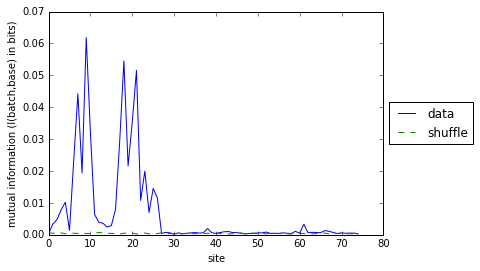

In [12]:
plt.plot(Ibp,label='data')
plt.plot(Ibp2,'--',label='shuffle')
plt.xlabel('site')
plt.ylabel('mutual information (I(batch,base) in bits)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))